# Documentacion de la libreria DeepXDE para el estudio de PINNs.


## Autores

- **María Flores Ceballos**  
  *AIR Institute*

- **Fernando Cagigas Villar**  
  *Bisite Research Group*


Se asume conocimiento básico de Redes Neuronales, previo a la lectura del documento.

## ¿Qué es DeepXDE?

**DeepXDE** es una biblioteca de Python diseñada para resolver ecuaciones diferenciales ordinarias (EDOs), ecuaciones diferenciales parciales (EDPs) y ecuaciones integrales utilizando técnicas de aprendizaje profundo. Facilita la implementación de **Redes Neuronales Informadas por Física** (PINNs), permitiendo a los investigadores y profesionales abordar problemas complejos en física, ingeniería y matemáticas aplicadas.

## ¿Qué son las PINNs?

Las **Redes Neuronales Informadas por Física** (*Physics-Informed Neural Networks*, PINNs) representan una innovadora intersección entre el aprendizaje profundo y las leyes físicas que rigen los sistemas naturales. A diferencia de las redes neuronales tradicionales que se entrenan exclusivamente con datos, las PINNs incorporan explícitamente principios físicos en su estructura y proceso de entrenamiento. Esto les permite resolver problemas complejos de manera eficiente y con una mayor precisión, aprovechando tanto los datos disponibles como el conocimiento previo sobre el comportamiento del sistema.

### Fundamento de las PINNs

En esencia, una PINN busca aproximar una función $ u(x) $ que satisface una ecuación diferencial determinada, junto con las condiciones de frontera e iniciales asociadas. La clave está en utilizar la capacidad de las redes neuronales para aproximar funciones complejas y, al mismo tiempo, imponer que estas aproximaciones respeten las leyes físicas subyacentes.

#### Proceso de Entrenamiento

1. **Definición del Problema Físico**: Se parte de una ecuación diferencial que describe el fenómeno físico de interés, por ejemplo, la ecuación de calor, la ecuación de onda, o las ecuaciones de Navier-Stokes para la dinámica de fluidos.

2. **Construcción de la Red Neuronal**: Se diseña una red neuronal que tomará como entrada las variables espaciales y temporales (por ejemplo, \( x \) y \( t \)) y devolverá la aproximación de la solución $ u(x, t) $.

3. **Incorporación de las Leyes Físicas**: Se utiliza la diferenciación automática (*autodiff*) para calcular las derivadas necesarias y construir los residuos de la ecuación diferencial. Estos residuos forman parte de la función de pérdida que se minimizará durante el entrenamiento.

4. **Optimización**: Se ajustan los pesos y sesgos de la red neuronal para minimizar la función de pérdida, que incluye tanto el error en los datos disponibles como el cumplimiento de las leyes físicas.

### Ejemplo Simplificado: Ecuación Diferencial Ordinaria (EDO)

Consideremos la EDO lineal de primer orden:

$$
\frac{dy}{dx} + y = 0, \quad y(0) = 1
$$

La solución analítica es $y(x) = e^{-x} $. Veamos cómo una PINN puede aproximar esta solución.

#### Paso 1: Definición de la Red Neuronal

La red neuronal toma $ x $ como entrada y devuelve una aproximación de $ y(x) $. Supongamos que la red tiene una sola capa oculta con una función de activación no lineal, como la tangente hiperbólica.

#### Paso 2: Incorporación de la Ecuación Diferencial

Utilizando la diferenciación automática, calculamos $ \frac{dy}{dx} $ a partir de la salida de la red neuronal. El residuo de la EDO se define como:

$$
\text{Residuo} = \frac{dy}{dx} + y
$$

#### Paso 3: Función de Pérdida

La función de pérdida total incluye dos términos:

1. **Error en la Ecuación Diferencial**:$\frac{1}{N} \sum_{i=1}^{N} \left( \frac{dy}{dx}\bigg|_{x_i} + y(x_i) \right)^2 $
2. **Error en la Condición Inicial**: $ \left( y(0) - 1 \right)^2 $

El objetivo del entrenamiento es minimizar esta función de pérdida, asegurando que la red neuronal no solo se ajuste a los datos, sino que también satisfaga la EDO.

#### Paso 4: Entrenamiento y Optimización

Mediante algoritmos de optimización como Adam o L-BFGS, ajustamos los parámetros de la red neuronal para minimizar la función de pérdida. A medida que el entrenamiento progresa, la solución aproximada $ y(x) $ converge hacia la solución analítica $ e^{-x} $.

### Ventajas de Utilizar PINNs

1. **Integración de Conocimiento Físico**: Al incorporar las leyes físicas directamente en el modelo, las PINNs requieren menos datos empíricos y pueden generalizar mejor en regiones con escasez de datos.

2. **Flexibilidad y Adaptabilidad**: Las PINNs pueden manejar geometrías complejas, condiciones de frontera variadas y sistemas multidimensionales sin la necesidad de discretización tradicional.

3. **Capacidad para Resolver Problemas Inversos**: Más allá de resolver EDOs y EDPs, las PINNs pueden identificar parámetros desconocidos en las ecuaciones diferenciales a partir de datos observados.

4. **Eficiencia Computacional**: Para problemas de alta dimensionalidad, las PINNs pueden ser más eficientes que los métodos numéricos tradicionales, como los métodos de elementos finitos, que sufren de la "maldición de la dimensionalidad".

### Aplicaciones en Física

Las PINNs han demostrado ser herramientas poderosas en diversas áreas de la física, incluyendo pero no limitadas a:

- **Dinámica de Fluidos**: Resolución de las ecuaciones de Navier-Stokes para simular el comportamiento de fluidos en diferentes condiciones.

- **Electrodinámica**: Simulación de campos electromagnéticos en medios complejos.

- **Mecánica Cuántica**: Resolución de la ecuación de Schrödinger para sistemas con potenciales complicados.

- **Transferencia de Calor**: Modelado de la difusión de calor en materiales con propiedades variables.

- **Geofísica**: Estimación de propiedades del subsuelo a partir de datos sísmicos.

### Ejemplo Práctico: Comparación con Métodos Numéricos Tradicionales

Consideremos la ecuación de Poisson en dos dimensiones:

$$
-\Delta u(x, y) = f(x, y), \quad (x, y) \in \Omega
$$
$$
u(x, y) = g(x, y), \quad (x, y) \in \partial\Omega
$$

Donde $ \Omega $ es una región espacial y $ \partial\Omega $ su frontera. Tradicionalmente, esta EDP se resuelve utilizando métodos como los elementos finitos o diferencias finitas, que requieren discretizar el dominio y resolver un sistema de ecuaciones lineales.

Con una PINN, podemos aproximar $ u(x, y) $ directamente mediante una red neuronal sin necesidad de una discretización explícita. La función de pérdida incorporará tanto el residuo de la EDP como las condiciones de frontera, permitiendo que la red neuronal aprenda la solución de manera continua en todo el dominio.

#### Ventajas Observadas:

- **Reducción de la Dimensionalidad del Problema**: No es necesario manejar mallas o discretizaciones, lo que simplifica la implementación para geometrías complejas.

- **Mejor Manejo de Condiciones de Frontera Complejas**: Las PINNs pueden imponer condiciones de frontera de manera más flexible y precisa.

- **Facilidad para Resolver Problemas Inversos**: Identificación de parámetros desconocidos en la EDP a partir de datos experimentales.

### Limitaciones y Desafíos

Aunque las PINNs ofrecen numerosas ventajas, también presentan ciertos desafíos:

1. **Optimización Difícil**: La función de pérdida puede ser compleja y tener múltiples mínimos locales, lo que dificulta el entrenamiento eficiente de la red neuronal.

2. **Requerimiento de Cálculos de Derivadas**: El uso intensivo de la diferenciación automática puede ser computacionalmente costoso, especialmente para problemas de alta dimensionalidad.

3. **Selección de Arquitectura y Hiperparámetros**: Determinar la arquitectura óptima de la red y ajustar los hiperparámetros requiere experiencia y puede afectar significativamente el desempeño de la PINN.

4. **Convergencia y Estabilidad**: Asegurar que la solución converja hacia la solución física correcta y mantener la estabilidad numérica durante el entrenamiento puede ser desafiante.

### Idea con la que os tenbeís que quedar

Las Redes Neuronales Informadas por Física representan un paradigma emergente en la resolución de problemas físicos complejos, combinando la flexibilidad y capacidad de generalización del aprendizaje profundo con el rigor y precisión de las leyes físicas. Para los físicos altamente cualificados, las PINNs ofrecen una herramienta poderosa que puede complementar y, en algunos casos, superar los métodos numéricos tradicionales, especialmente en escenarios donde la complejidad geométrica y la dimensionalidad son factores limitantes.

A lo largo de este notebook, profundizaremos en la implementación práctica de PINNs utilizando la biblioteca **DeepXDE**, ilustrando su aplicación en problemas físicos concretos y demostrando cómo estas redes pueden facilitar el avance en la investigación y la ingeniería aplicada.




## Ventajas de las PINNs

Las **Redes Neuronales Informadas por Física (PINNs)** ofrecen múltiples ventajas que las hacen especialmente atractivas para resolver problemas complejos en física y otras disciplinas científicas. A continuación, se detallan las principales ventajas, acompañadas de ejemplos prácticos y explicaciones que destacan su utilidad en escenarios avanzados.

### 1. Generalización Mejorada

**Descripción:**
Al incorporar conocimiento físico directamente en la estructura y el entrenamiento de la red neuronal, las PINNs son capaces de generalizar mejor más allá de los datos de entrenamiento proporcionados. Esto significa que pueden hacer predicciones precisas en regiones del dominio donde los datos son escasos o inexistentes.

**Ejemplo Práctico:**
Consideremos la resolución de la ecuación de difusión del calor en una varilla con condiciones de frontera no lineales. Los métodos tradicionales podrían requerir una malla muy fina para capturar comportamientos complejos en ciertas regiones. En contraste, una PINN entrenada con puntos de muestreo estratégicamente seleccionados puede aprender la solución globalmente, proporcionando resultados precisos incluso en áreas con gradientes elevados de temperatura.

**Beneficios:**
- **Reducción del Sobrefitting:** Al integrar las leyes físicas, se limita la posibilidad de que la red aprenda patrones irrelevantes presentes en los datos.
- **Predicciones Confiables:** Las soluciones obtenidas respetan las restricciones físicas, lo que aumenta la confianza en las predicciones fuera del conjunto de entrenamiento.

### 2. Eficiencia de Datos

**Descripción:**
Las PINNs requieren menos datos experimentales en comparación con las redes neuronales tradicionales. Esto se debe a que las leyes físicas actúan como una guía adicional durante el entrenamiento, reduciendo la dependencia exclusiva de los datos empíricos.

**Ejemplo Práctico:**
En el estudio de flujos turbulentos, obtener datos experimentales detallados puede ser costoso y técnicamente desafiante. Una PINN puede ser entrenada con una cantidad limitada de datos experimentales, complementados con las ecuaciones de Navier-Stokes, para predecir el comportamiento del flujo en condiciones no medidas.

**Beneficios:**
- **Ahorro de Recursos:** Menor necesidad de experimentación extensiva, lo que reduce costos y tiempo.
- **Mejor Manejo de Datos Escasos:** Ideal para sistemas donde la recolección de datos es difícil o inviable.

### 3. Flexibilidad

**Descripción:**
Las PINNs son altamente flexibles y pueden aplicarse a una amplia variedad de problemas donde los métodos numéricos tradicionales enfrentan dificultades, especialmente en geometrías complejas o en sistemas multidimensionales.

**Ejemplo Práctico:**
En la modelación de materiales con estructuras fractales o superficies irregulares, los métodos de elementos finitos pueden complicarse significativamente debido a la necesidad de discretizar geometrías complejas. Las PINNs, al operar en un espacio continuo, pueden manejar estas geometrías sin la necesidad de una malla explícita, facilitando la implementación y mejorando la precisión.

**Beneficios:**
- **Adaptabilidad a Geometrías Complejas:** No se requiere discretización previa, lo que simplifica la implementación en dominios irregulares.
- **Aplicación Multidimensional:** Capaces de manejar problemas en altas dimensiones sin un aumento exponencial en la complejidad computacional.

### 4. Resolución de Problemas Inversos

**Descripción:**
Además de resolver ecuaciones diferenciales directas, las PINNs pueden abordar problemas inversos, donde se busca identificar parámetros desconocidos dentro de las ecuaciones a partir de datos observacionales.

**Ejemplo Práctico:**
En geofísica, determinar las propiedades del subsuelo a partir de datos sísmicos es un problema inverso clásico. Utilizando PINNs, es posible inferir parámetros como la velocidad de propagación de ondas sísmicas o la densidad del material, integrando los datos sísmicos con las ecuaciones de la elasticidad.

**Beneficios:**
- **Identificación de Parámetros Ocultos:** Permite extraer información sobre propiedades internas del sistema que no son directamente observables.
- **Mejora en la Interpretación de Datos:** Combina datos experimentales con modelos físicos para obtener una comprensión más profunda del sistema estudiado.

### 5. Integración Natural con Métodos de Optimización y Aprendizaje Profundo

**Descripción:**
Las PINNs se benefician de las técnicas avanzadas de optimización y aprendizaje profundo, permitiendo aprovechar herramientas como el descenso de gradiente estocástico, regularización, y arquitecturas de redes neuronales modernas.

**Ejemplo Práctico:**
En la simulación de plasmas en física de alta energía, las PINNs pueden utilizar arquitecturas de redes profundas con capas residuales para capturar dinámicas complejas y no lineales, optimizando simultáneamente múltiples variables y parámetros del sistema.

**Beneficios:**
- **Eficiencia Computacional:** Utilizan algoritmos de optimización avanzados para acelerar el entrenamiento y mejorar la convergencia.
- **Escalabilidad:** Pueden escalar a sistemas grandes y complejos gracias a las mejoras en las arquitecturas de redes y hardware especializado como GPUs.

### 6. Soluciones Continuas y Diferenciables

**Descripción:**
Las soluciones obtenidas mediante PINNs son funciones continuas y completamente diferenciables, lo que es beneficioso para análisis posteriores como la derivación de propiedades adicionales del sistema o la integración en modelos más complejos.

**Ejemplo Práctico:**
En la mecánica de fluidos, una solución continua permite derivar vorticidad y otros parámetros de interés directamente a partir de la solución de la velocidad, facilitando análisis más profundos sin necesidad de discretizar nuevamente.

**Beneficios:**
- **Facilidad de Análisis Posterior:** Permite calcular derivadas de alto orden y otros parámetros directamente de la solución.
- **Compatibilidad con Modelos Multicapa:** Las soluciones diferenciables pueden integrarse fácilmente en modelos jerárquicos o sistemas de ecuaciones acopladas.

### 7. Manejo de Condiciones de Borde y Singularidades

**Descripción:**
Las PINNs manejan de manera eficiente las condiciones de borde complejas y las singularidades presentes en ciertos problemas físicos, al incorporar estas restricciones directamente en la función de pérdida.

**Ejemplo Práctico:**
En la teoría de campos cuánticos, las singularidades en puntos específicos pueden representar comportamientos críticos del sistema. Las PINNs pueden entrenarse para respetar estas singularidades, proporcionando soluciones que capturan correctamente las dinámicas en estos puntos críticos.

**Beneficios:**
- **Implementación Directa de Condiciones Complejas:** Facilita la incorporación de restricciones no lineales o dependientes del contexto.
- **Precisión en Regiones Críticas:** Mejora la exactitud de la solución en zonas donde los métodos tradicionales pueden fallar o ser imprecisos.

### 8. Capacidad de Adaptarse a Datos Multiescala

**Descripción:**
Las PINNs son capaces de manejar fenómenos que ocurren a múltiples escalas espaciales y temporales, lo que es particularmente útil en sistemas complejos donde interactúan diferentes procesos a diversas escalas.

**Ejemplo Práctico:**
En la simulación de procesos geológicos, como la formación de montañas, interactúan procesos a escalas macroscópicas y microscópicas. Las PINNs pueden capturar estas interacciones sin necesidad de modelar cada escala por separado, proporcionando una visión integrada del fenómeno.

**Beneficios:**
- **Captura de Dinámicas Complejas:** Permite modelar interacciones entre procesos a diferentes escalas sin una complicación excesiva en la discretización.
- **Mejora en la Exactitud de las Simulaciones:** Al considerar múltiples escalas simultáneamente, las soluciones son más representativas de la realidad física.

### 9. Reducción de la "Maldición de la Dimensionalidad"

**Descripción:**
Mientras que los métodos numéricos tradicionales, como los métodos de elementos finitos, enfrentan un crecimiento exponencial en la complejidad con el aumento de dimensiones, las PINNs manejan mejor los problemas de alta dimensionalidad gracias a su naturaleza basada en funciones continuas.

**Ejemplo Práctico:**
En la simulación de sistemas de partículas en física estadística, donde se deben considerar múltiples dimensiones debido a la interacción de numerosas partículas, las PINNs pueden modelar la distribución de partículas de manera eficiente sin la necesidad de una discretización exhaustiva.

**Beneficios:**
- **Escalabilidad a Altas Dimensiones:** Permite abordar problemas en espacios de alta dimensionalidad que serían prohibitivamente costosos con métodos tradicionales.
- **Eficiencia en Computación y Memoria:** Reduce significativamente los requisitos computacionales y de almacenamiento en comparación con métodos basados en mallas.

### 10. Integración con Datos Observacionales y Simulados

**Descripción:**
Las PINNs pueden combinar datos observacionales reales con datos generados sintéticamente a partir de modelos físicos, lo que mejora la precisión y la robustez de las soluciones obtenidas.

**Ejemplo Práctico:**
En la meteorología, las PINNs pueden integrar datos de sensores reales con simulaciones de modelos atmosféricos para predecir condiciones climáticas futuras con mayor exactitud, aprovechando tanto la información empírica como las leyes físicas que rigen la atmósfera.

**Beneficios:**
- **Sinergia entre Datos y Física:** Combina lo mejor de ambos mundos, utilizando datos para calibrar y ajustar las soluciones físicas.
- **Mejora en la Robustez de las Predicciones:** Aumenta la confiabilidad de las soluciones al considerar múltiples fuentes de información.



## Fundamentos Matemáticos

### Ecuaciones Diferenciales

Las ecuaciones diferenciales describen cómo cambia una cantidad en relación con otra y son fundamentales en la modelación de fenómenos físicos como la mecánica, la termodinámica y la dinámica de fluidos.

**Ejemplo de una EDO:**

$$
\frac{dy}{dx} + y = 0
$$

### Incorporación en Redes Neuronales

En las PINNs, buscamos una función \( u(x) \) aproximada por una red neuronal que satisfaga:
- **La ecuación diferencial**: $$\mathcal{N}[u(x)] = 0 $$
- **Condiciones de frontera/iniciales**: $$ u(x_{\text{borde}}) = g(x_{\text{borde}}) $$

Donde $ \mathcal{N} $ es un operador diferencial que puede incluir derivadas parciales, integrales, etc.


## Arquitectura General de una PINN

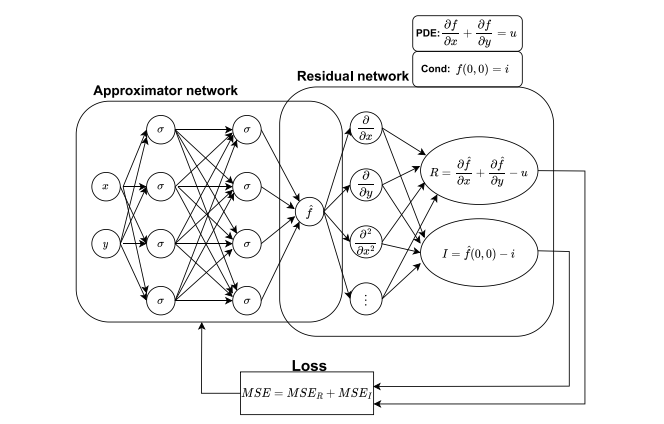

Las **Redes Neuronales Informadas por Física (PINNs)** combinan la potencia de las redes neuronales profundas con las leyes físicas que describen los sistemas naturales. A continuación, se detalla cada componente fundamental de la arquitectura de una PINN, proporcionando una comprensión profunda de su funcionamiento y utilidad.

### 1. Entrada: Puntos en el Dominio Espacial y/o Temporal

**Descripción:**

La entrada de una PINN consiste en puntos que representan las coordenadas espaciales y/o temporales del dominio del problema físico que se está resolviendo. Estos puntos pueden ser generados de manera aleatoria (muestreo uniforme) o mediante métodos de muestreo adaptativos que se enfocan en regiones de interés específicas.

**Detalles Adicionales:**

- **Dominio de Definición:** El dominio puede ser un intervalo en una dimensión (por ejemplo, espacio unidimensional), una región en dos dimensiones (como una placa) o en múltiples dimensiones para problemas más complejos.
  
- **Muestreo de Puntos:** 
  - **Puntos de Dominio (Interior):** Utilizados para evaluar el residuo de la ecuación diferencial.
  - **Puntos de Frontera:** Utilizados para imponer las condiciones de frontera e iniciales.
  
- **Distribución de Puntos:** La distribución puede ser uniforme o adaptativa, dependiendo de la complejidad del problema y de la presencia de características como discontinuidades o singularidades.

**Ejemplo Práctico:**

Para resolver la ecuación de difusión en una barra unidimensional, los puntos de entrada podrían ser posiciones \( x \) a lo largo de la barra y tiempos \( t \):

```python
import numpy as np

# Definir el dominio espacial y temporal
x_data = np.linspace(0, 1, num=100).reshape(-1, 1)  # Espacio de 0 a 1
t_data = np.linspace(0, 1, num=100).reshape(-1, 1)  # Tiempo de 0 a 1

# Crear una malla de puntos (x, t)
test_x, test_t = np.meshgrid(x_data, t_data)
test_domain = np.hstack((test_x.flatten()[:, None], test_t.flatten()[:, None]))



## Función de Pérdida en PINNs

La función de pérdida \( L \) en una PINN generalmente incluye varios términos que garantizan que la solución cumpla con la ecuación diferencial y las condiciones de frontera/iniciales.

### Términos de la Función de Pérdida

- **Residuo de la Ecuación Diferencial**:

$$
L_{\text{Ecuación}} = \frac{1}{N}\sum_{i=1}^{N} \left| \mathcal{N}[u(x_i; \theta)] \right|^2
$$

- **Condiciones de Frontera/Iniciales**:

$$
L_{\text{Frontera}} = \frac{1}{M}\sum_{j=1}^{M} \left| u(x_j^{\text{borde}}; \theta) - g(x_j^{\text{borde}}) \right|^2
$$

- **Datos Experimentales (si existen)**:

$$
L_{\text{Datos}} = \frac{1}{K}\sum_{k=1}^{K} \left| u(x_k^{\text{data}}; \theta) - y_k \right|^2
$$

- **Pérdida Total**:

$$
L = L_{\text{Ecuación}} + L_{\text{Frontera}} + L_{\text{Datos}}
$$


## Herramientas Necesarias

Para seguir este notebook, necesitarás tener instaladas las siguientes herramientas:

- **Python 3.6+**
- **DeepXDE**: Biblioteca principal para implementar PINNs.
- **PyTorch**: Backends para operaciones tensoriales y cálculo automático de derivadas, esta configurado para ejecutarse en gráfica (CUDA), también funciona con TF esta librería pero en nuestro caso va a ser TORCH (Si eres de tensorflow, todos hemos tenido que en algún momento pasarnos a torch, al principio cuesta admitirlo, pero es mejor).
- **NumPy**: Para operaciones numéricas.
- **Matplotlib**: Para visualización de resultados.


In [1]:
#import deepxde as dde
import torch
import numpy as np
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.FloatTensor)

# Configurar el dispositivo, si no tienes cuda bien instalado o directamente no tienes grafica, 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)


Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Usando dispositivo: cuda


c:\Users\ferna\AppData\Local\anaconda3\envs\signal_Analysis\lib\site-packages\torch\__init__.py:749: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\tensor\python_tensor.cpp:433.)
  _C._set_default_tensor_type(t)


## Parte de código

Este notebook consiste en un breve resumen de la implementación de DeepXDE para el estudio de las Physics-informed neural networks (PINNs). El link a github es https://github.com/lululxvi/deepxde


Las funciones básicas que incluye la librería se ilustrarán a través de un sencillo ejemplo.


Comenzamos instalando la libreria deepxde, que no está por defecto en jupyter ni en python.

## Ejemplo 1: ecuación del calor 1D

Vamos a reproducir el código del vídeo de Youtube: https://www.youtube.com/watch?v=EO2lc4tXBHA porque es una introducción muy sencilla

Queremos estudiar la EDP:

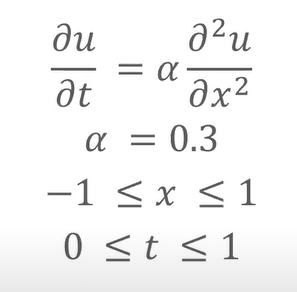

Con la condición inicial:

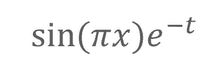

En primer lugar, se define el intervalo de estudio de la EDP:

In [2]:
geom = dde.geometry.Interval(-1,1)    #entiendo que esto es la region espacial a estudiar
timedomain = dde.geometry.TimeDomain(0,1)  # y esta, la temporal
geomtime = dde.geometry.GeometryXTime(geom, timedomain)  #aqui se juntan las dos

Asimismo, se define la función que representa la EDP:

In [3]:
def pde(x,y): # seria mejor poner u en lugar de y para ser coherentes con la notacion
  dy_t = dde.grad.jacobian(y, x, j=1) # jacobiano porque es la primera derivada
  dy_xx = dde.grad.hessian(y, x, j=0) # hessiano porque es la segunda derivada
  return (dy_t-dy_xx*0.3)  # recordar que el valor de alfa es conocido

Más tarde, se fijan las condiciones:

In [4]:
def func(x):
  return np.sin(np.pi*x[:, 0:1])*np.exp(-x[:,1:])  #la primera columna es la x que está en el seno y la t es la segunda columna, en la exp.

In [5]:
#boundary condition o condiciones de frontera
bc = dde.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary) #toma el recinto espacial y temporal, func es el valor en la frontera
# lambda es una funcion que nos dice si estamos en un punto de frontera o no
#initial condition o condiciones iniciales
ic = dde.IC(geomtime, func, lambda _, on_initial: on_initial) # en este caso lambda nos dice si estamos en el instante inicial

Ahora, se construyen los datos de entrenamiento:

In [6]:
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain=4000, # puntos de entrenamiento escogidos aleatoriamente
    num_boundary=2000, # puntos de frontera
    num_initial=1000, # puntos en el instante inicial
    solution=func, # solucion exacta con la que comparar durante el entrenamiento
    num_test=1000, # puntos para evaluar nuestro modelo
)

La arquitectura de la red neuronal se fija de la siguiente forma:

In [7]:
layer_size = [2] + [32]*3 + [1] # la capa de entrada tiene 2 neuronas, porque hay dos inputs, la de salida, uno y
#hay 3 capas ocultas con 32 neuronas cada una
activation = "tanh" # funcion de activacion
initializer = "Glorot uniform" # metodo de inicializacion de los pesos de la red neuronal
optimizer = "adam" # optimizador escogido, como en el tfm de jaime

# con la siguiente linea se crea una feedforward neural network
net = dde.maps.FNN(layer_size, activation, initializer)

Definimos el modelo con la arquitectura previa:

In [8]:
model = dde.Model(data, net) # se crea el modelo que contiene los datos y la red a entrenar y evaluar
model.compile("adam", lr = 0.001, metrics = ["l2 relative error"]) # se configuran los parametros del modelo, optimizador adam, learning rate de
# adam y la metrica del error.

Compiling model...
'compile' took 1.515342 s



Y, seguidamente, se entrena, va a tardar, se paciente, no te pongas a ejecutar 20 celdas a la vez ;):

In [9]:
losshistory, train_state = model.train(epochs=10000) # se entrena el modelo con el numero de epocas citado. Contiene la historia de las pérdidas,
# y el estado del entrenamiento cada vez que se llama a .train()

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [1.05e-01, 9.11e-02, 3.54e-01]    [1.12e-01, 9.11e-02, 3.54e-01]    [9.92e-01]    


c:\Users\ferna\AppData\Local\anaconda3\envs\signal_Analysis\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\cuda\CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


1000      [1.34e-03, 1.77e-03, 1.05e-03]    [1.01e-03, 1.77e-03, 1.05e-03]    [2.95e-01]    
2000      [4.79e-04, 4.52e-04, 1.45e-04]    [5.15e-04, 4.52e-04, 1.45e-04]    [2.77e-01]    
3000      [1.08e-04, 1.95e-05, 1.20e-05]    [1.36e-04, 1.95e-05, 1.20e-05]    [2.82e-01]    
4000      [4.71e-05, 7.50e-06, 2.76e-06]    [5.88e-05, 7.50e-06, 2.76e-06]    [2.82e-01]    
5000      [3.08e-05, 4.26e-06, 1.64e-06]    [3.72e-05, 4.26e-06, 1.64e-06]    [2.82e-01]    
6000      [2.29e-05, 3.46e-06, 1.40e-06]    [2.74e-05, 3.46e-06, 1.40e-06]    [2.81e-01]    
7000      [2.15e-05, 4.40e-06, 2.42e-06]    [2.28e-05, 4.40e-06, 2.42e-06]    [2.81e-01]    
8000      [1.62e-05, 4.13e-06, 4.72e-06]    [1.90e-05, 4.13e-06, 4.72e-06]    [2.82e-01]    
9000      [1.32e-05, 1.47e-06, 6.31e-07]    [1.61e-05, 1.47e-06, 6.31e-07]    [2.81e-01]    
10000     [1.18e-05, 1.31e-06, 5.38e-07]    [1.46e-05, 1.31e-06, 5.38e-07]    [2.81e-01]    

Best model at step 10000:
  train loss: 1.37e-05
  test loss: 1.64e-0

Obtenemos los resultados de la red neuronal

In [10]:
x_data = np.linspace(-1,1,num=100)
t_data = np.linspace(0,1,num=100)
test_x, test_t = np.meshgrid(x_data, t_data) # creacion de malla de datos espaciales y temporales para el dominio
test_domain = np.vstack((np.ravel(test_x), np.ravel(test_t))).T # esta operacion es para obtener una matriz donde cada elemento sea de la forma (x,t)
predicted_solution = model.predict(test_domain) # prediccion de la solucion
residual = model.predict(test_domain, operator=pde) # residual es la discrepancia entre nuestra solucion predicha y la que deberia ser solucion
# segun la PDE

Al final del vídeo muestra cómo representar los resultados mediante un plot, es decir, predicted_solution y, aparte, residual. No indica bien como realizarlo, por lo que lo vamos a hacer a nuestra forma. Primero, compararemos la solución predicha por la PINN con la solución exacta para verificar la precisión del modelo.

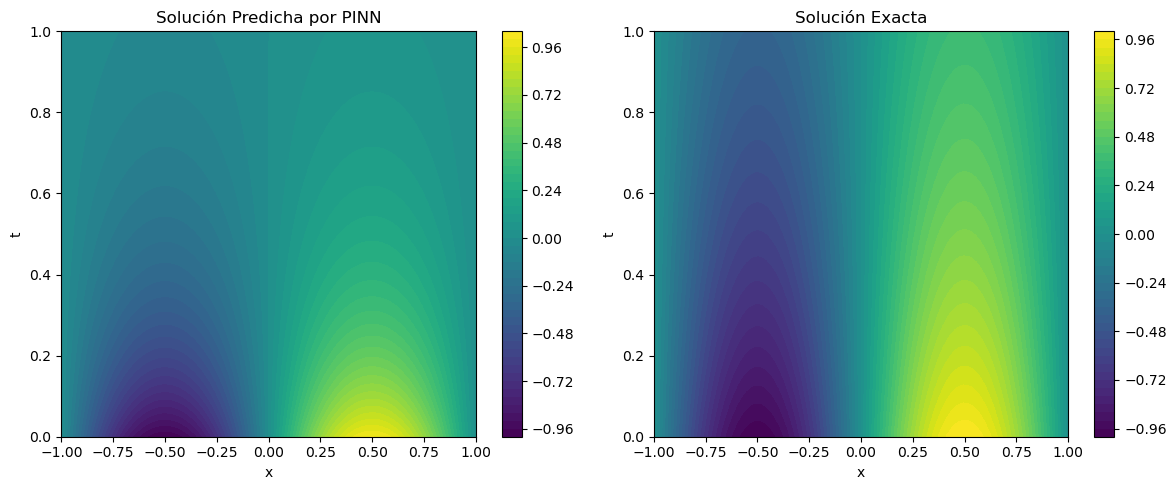

In [21]:
# Definir la solución exacta
def exact_solution(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])

# Generar puntos de prueba
x_data = np.linspace(-1, 1, num=100)
t_data = np.linspace(0, 1, num=100)
test_x, test_t = np.meshgrid(x_data, t_data)
test_domain = np.vstack((np.ravel(test_x), np.ravel(test_t))).T

# Predicción de la solución usando la PINN
predicted_solution = model.predict(test_domain)

# Calcular la solución exacta en los mismos puntos
exact_sol = exact_solution(test_domain)

# Reshape para graficar
predicted_solution_2d = predicted_solution.reshape(test_x.shape)
exact_sol_2d = exact_sol.reshape(test_x.shape)

# Graficar la solución predicha
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cp = plt.contourf(test_x, test_t, predicted_solution_2d, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Solución Predicha por PINN')
plt.xlabel('x')
plt.ylabel('t')

# Graficar la solución exacta
plt.subplot(1, 2, 2)
cp = plt.contourf(test_x, test_t, exact_sol_2d, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Solución Exacta')
plt.xlabel('x')
plt.ylabel('t')

plt.tight_layout()
plt.show()

Analizamos el residuo

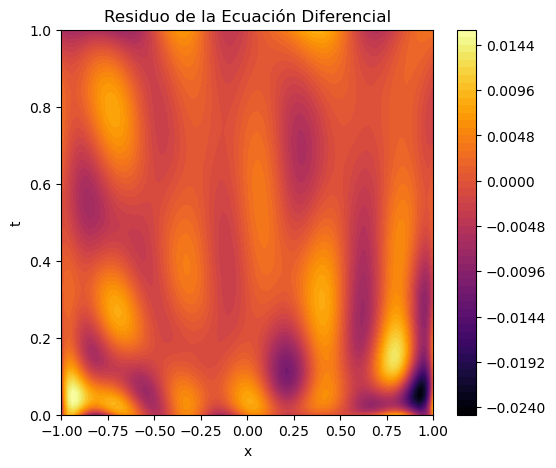

In [13]:
# Calcular el residuo de la PDE
residual = model.predict(test_domain, operator=pde)

# Reshape para graficar
residual_2d = residual.reshape(test_x.shape)

# Graficar el residuo
plt.figure(figsize=(6, 5))
cp = plt.contourf(test_x, test_t, residual_2d, levels=50, cmap='inferno')
plt.colorbar(cp)
plt.title('Residuo de la Ecuación Diferencial')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


Solución exacta vs predicha (Error Absoluto)

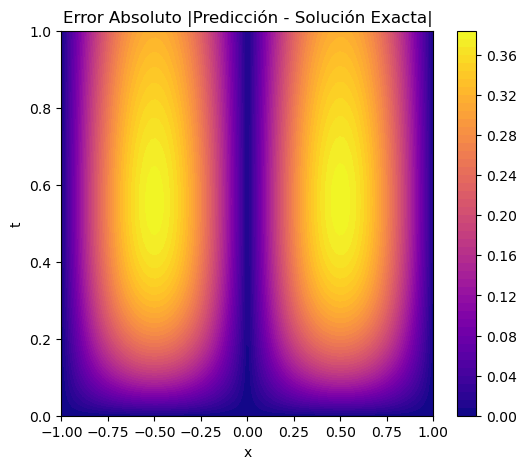

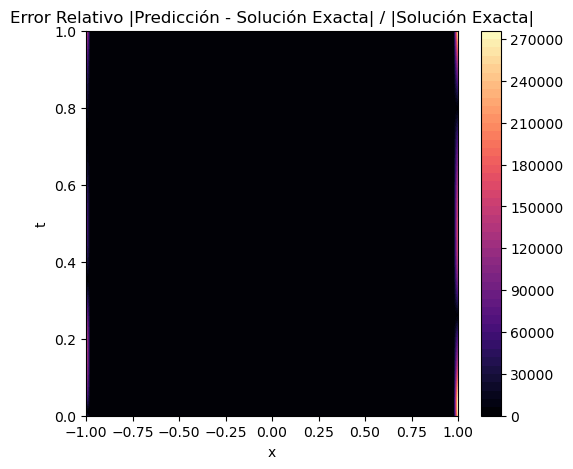

In [15]:
# Calcular el error absoluto
error = np.abs(predicted_solution_2d - exact_sol_2d)

# Graficar el error absoluto
plt.figure(figsize=(6, 5))
cp = plt.contourf(test_x, test_t, error, levels=50, cmap='plasma')
plt.colorbar(cp)
plt.title('Error Absoluto |Predicción - Solución Exacta|')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# Calcular el error relativo
error_relativo = error / np.abs(exact_sol_2d + 1e-8)  # Añadir pequeño valor para evitar división por cero

# Graficar el error relativo
plt.figure(figsize=(6, 5))
cp = plt.contourf(test_x, test_t, error_relativo, levels=50, cmap='magma')
plt.colorbar(cp)
plt.title('Error Relativo |Predicción - Solución Exacta| / |Solución Exacta|')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


Solución predicha en 3D

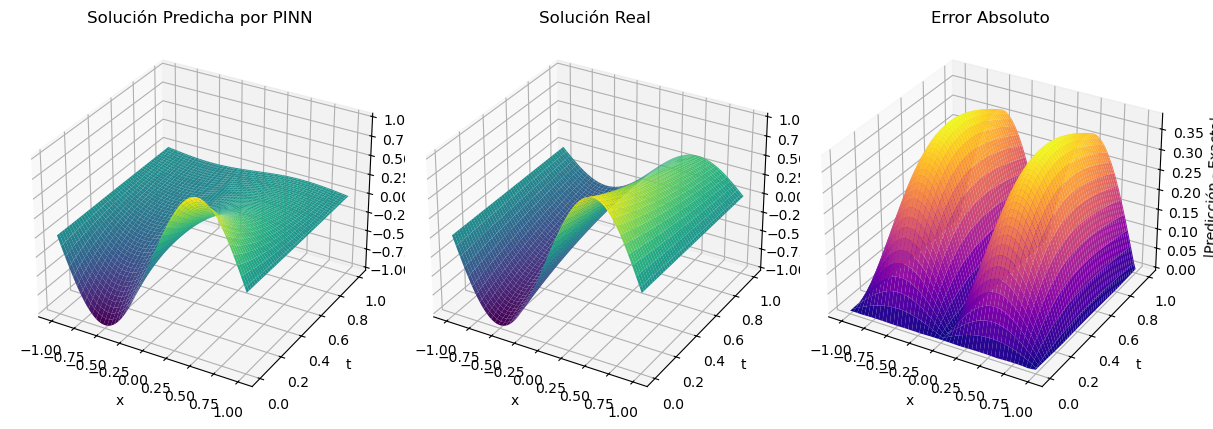

In [26]:
# Graficar la solución predicha en 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(test_x, test_t, predicted_solution_2d, cmap='viridis')
ax1.set_title('Solución Predicha por PINN')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x, t)')

ax1 = fig.add_subplot(132, projection='3d')
ax1.plot_surface(test_x, test_t, exact_sol_2d, cmap='viridis')
ax1.set_title('Solución Real')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x, t)')

ax2 = fig.add_subplot(133, projection='3d')
ax2.plot_surface(test_x, test_t, error, cmap='plasma')
ax2.set_title('Error Absoluto')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('|Predicción - Exacta|')

plt.tight_layout()
plt.show()


Podemos ver como evoluciona el loss o perdida

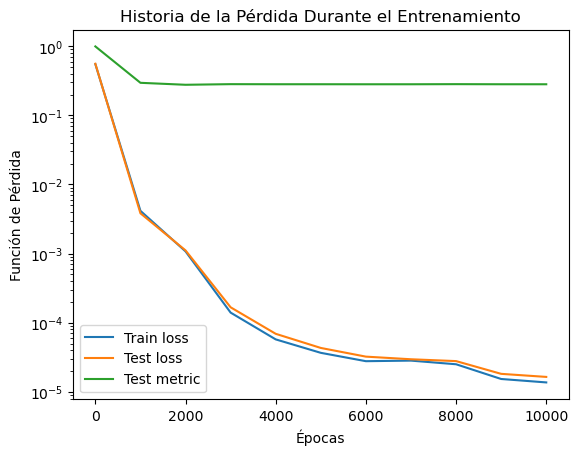

In [17]:
# Graficar la historia de la pérdida
dde.utils.plot_loss_history(losshistory)
plt.title('Historia de la Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Función de Pérdida')
plt.show()


In [18]:
# Calcular métricas de error
max_error = np.max(error)
mean_error = np.mean(error)
median_error = np.median(error)

print(f"Error Máximo Absoluto: {max_error:.5f}")
print(f"Error Medio Absoluto: {mean_error:.5f}")
print(f"Error Mediano Absoluto: {median_error:.5f}")

Error Máximo Absoluto: 0.38076
Error Medio Absoluto: 0.19554
Error Mediano Absoluto: 0.20205


# Ejemplo 2: Ecuación de Poisson

Resolveremos la siguiente ecuación

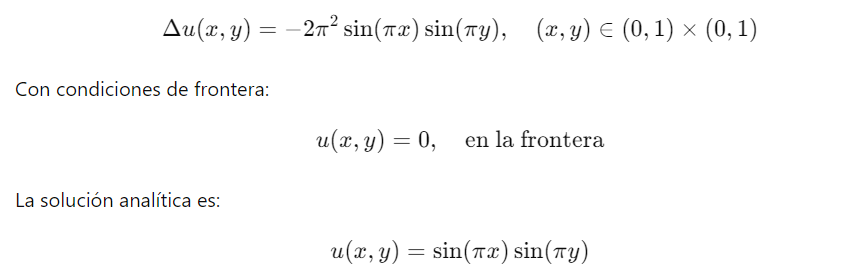

Dominio

In [31]:
geom = dde.geometry.Rectangle([0, 0], [1, 1])


Ecuación

In [32]:
def pde(x, y):
    u = y
    u_xx = dde.grad.hessian(y, x, i=0, j=0)
    u_yy = dde.grad.hessian(y, x, i=1, j=1)
    return u_xx + u_yy + 2 * np.pi**2 * dde.backend.sin(np.pi * x[:, 0:1]) * dde.backend.sin(np.pi * x[:, 1:2])


Condiciones de Frontera

In [33]:
# Definir la condición de frontera: u(x, y) = 0 en la frontera
def boundary(x, on_boundary):
    return on_boundary

# Condición de Dirichlet: u(x, y) = 0 en la frontera
bc = dde.DirichletBC(geom, lambda x: 0, boundary)


Configuración del problema y de la red neuronal

In [34]:
data = dde.data.PDE(
    geom,
    pde,
    bc,
    num_domain=4000,
    num_boundary=1000,
    solution=lambda x: np.sin(np.pi * x[:, 0:1]) * np.sin(np.pi * x[:, 1:2]),
)
#Red
net = dde.maps.FNN([2] + [50] * 3 + [1], "tanh", "Glorot normal")


Compilar y entrenar el modelo

In [35]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
model.train(epochs=10000)


Compiling model...
'compile' took 0.000499 s

Training model...

Step      Train loss              Test loss               Test metric
0         [8.04e+01, 1.94e-01]    [8.04e+01, 1.94e-01]    []  
1000      [1.04e-02, 1.09e-02]    [1.04e-02, 1.09e-02]    []  
2000      [1.16e-03, 4.82e-03]    [1.16e-03, 4.82e-03]    []  
3000      [9.80e-04, 2.68e-03]    [9.80e-04, 2.68e-03]    []  
4000      [6.33e-03, 1.46e-03]    [6.33e-03, 1.46e-03]    []  
5000      [5.05e-04, 7.31e-04]    [5.05e-04, 7.31e-04]    []  
6000      [6.46e-04, 3.78e-04]    [6.46e-04, 3.78e-04]    []  
7000      [9.33e-04, 2.06e-04]    [9.33e-04, 2.06e-04]    []  
8000      [2.24e-03, 1.44e-04]    [2.24e-03, 1.44e-04]    []  
9000      [1.75e-04, 8.68e-05]    [1.75e-04, 8.68e-05]    []  
10000     [1.78e-03, 6.14e-05]    [1.78e-03, 6.14e-05]    []  

Best model at step 9000:
  train loss: 2.62e-04
  test loss: 2.62e-04
  test metric: []

'train' took 73.515620 s



(<deepxde.model.LossHistory at 0x2521c29d1f0>,
 <deepxde.model.TrainState at 0x2521c29d9a0>)

Resultados, animo a que completeis con las representaciones anteriores

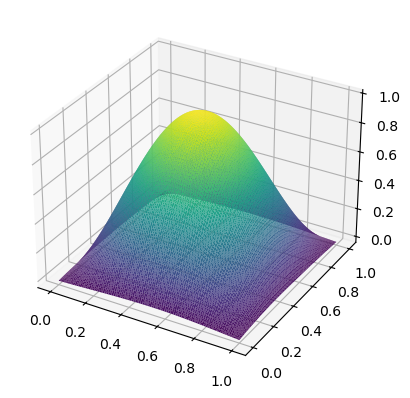

In [36]:
X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
X_test = np.hstack((X.flatten()[:, None], Y.flatten()[:, None]))
y_pred = model.predict(X_test)
y_true = np.sin(np.pi * X_test[:, 0:1]) * np.sin(np.pi * X_test[:, 1:2])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_test[:, 0], X_test[:, 1], y_pred.flatten(), cmap='viridis')
plt.show()


### INFO COMPLEMENTARÍA

Si quisieramos una función customizada de Loss:

In [17]:
def custom_loss(y_true, y_pred):
    return dde.backend.mean_squared_error(y_true, y_pred)

model.compile("adam", lr=0.001, loss=custom_loss)


Compiling model...
'compile' took 0.001242 s



Otra perdida customizada

In [42]:
# Función de pérdida personalizada con regularización L2
def custom_loss_l2(y_true, y_pred):
    mse = dde.backend.mean_squared_error(y_true, y_pred)
    regularization_loss = 0.01 * sum([dde.backend.sum(dde.backend.square(w)) for w in model.trainable_weights])
    return mse + regularization_loss

# Compilación del modelo con la nueva función de pérdida
model.compile(optimizer="adam", lr=0.001, loss=custom_loss_l2)


Compiling model...
'compile' took 0.000928 s



Métrica Personalizada: Coeficiente de Determinación ($R^2$)

In [53]:
import deepxde as dde

# Definir una métrica personalizada: Coeficiente de Determinación (R²)
def r2_metric(y_true, y_pred):
    total_sum_of_squares = dde.backend.sum(dde.backend.square(y_true - dde.backend.mean(y_true)))
    residual_sum_of_squares = dde.backend.sum(dde.backend.square(y_true - y_pred))
    return 1 - residual_sum_of_squares / total_sum_of_squares

# Implementación manual de la función de pérdida Mean Squared Error (MSE) utilizando el backend de DeepXDE
def custom_mse_loss(y_true, y_pred):
    return dde.backend.mean(dde.backend.square(y_true - y_pred))  # MSE = promedio de los errores al cuadrado, aunque adelante vais a ver otra forma de hacerlo

# Definir el callback para Early Stopping
early_stopping_callback = dde.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Compilación del modelo usando la función de pérdida personalizada MSE y la métrica personalizada R²
model.compile(optimizer="adam", lr=0.001, loss=custom_mse_loss, metrics=[r2_metric])

Compiling model...
'compile' took 0.000380 s



Función de pérdida ponderada para clases desbalanceadas


In [44]:
def weighted_loss(y_true, y_pred):
    weights = tf.constant([0.3, 0.7])  # Ejemplo de pesos para una clasificación binaria
    y_true = dde.backend.cast(y_true, 'int32')
    one_hot_labels = dde.backend.one_hot(y_true, 2)
    return dde.backend.mean(tf.reduce_sum(weights * dde.backend.categorical_crossentropy(one_hot_labels, y_pred), axis=-1))

# Compilación del modelo con la función de pérdida ponderada
model.compile(optimizer="adam", lr=0.001, loss=weighted_loss)


Compiling model...
'compile' took 0.000688 s



Early Stopping

In [49]:
from sklearn.metrics import mean_squared_error
# Función de pérdida personalizada utilizando mean_squared_error de scikit-learn
def custom_sklearn_mse_loss(y_true, y_pred):
    y_true_np = dde.backend.eval(y_true)  # Convertir tensores a arrays
    y_pred_np = dde.backend.eval(y_pred)
    return mean_squared_error(y_true_np, y_pred_np)

# Definir el callback para Early Stopping
early_stopping_callback = dde.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Compilación del modelo usando la función de pérdida de scikit-learn
model.compile(optimizer="adam", lr=0.001, loss=custom_sklearn_mse_loss)

Compiling model...
'compile' took 0.000516 s



Ale, hasta luego